Food Vision Project with 10% Data.

## Importing Helper Functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-19 05:21:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-19 05:21:54 (114 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## Working with 10% of data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-09-19 05:21:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.202.207, 74.125.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   122MB/s    in 16s     

2023-09-19 05:22:15 (95.4 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [4]:
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [5]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/risotto'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/escargots'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/beef_tartare'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/croque_madame'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/baby_back_ribs'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/tacos'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/scallops'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/deviled_eggs'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/oysters'.
There are 0 directories and 75 images in '101_food_c

## Preprocessing Images

In [7]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode = 'categorical',
                                                                                image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [8]:
# model checkpoint

checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only = True,
                                                         monitor = 'val_accuracy',
                                                         save_best_only = True)

In [9]:
# Data Augementation

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augementation = Sequential([

      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.2),
      layers.RandomZoom(0.2),
      layers.RandomHeight(0.2),
      layers.RandomWidth(0.2),

], name = "data_augementation")


## Feature Extracting Our Model With Transfer Learning

In [10]:
# base model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [11]:
# model architecture with trainable top layers
inputs = layers.Input(shape = (224, 224, 3), name = "input layer")
x = data_augementation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = "GlobalAveragePooling")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)

In [12]:
# compile and fit
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history_all_classes_10_percent  = model.fit(train_data_all_10_percent,
                                            epochs = 5,
                                            validation_data = test_data,
                                            validation_steps = int(0.15 * len(test_data)),
                                            callbacks = [checkpoint_callback])


Epoch 1/5
237/237 [==============================] - 116s 422ms/step - loss: 3.3875 - accuracy: 0.2664 - val_loss: 2.5827 - val_accuracy: 0.4184
Epoch 2/5
237/237 [==============================] - 74s 311ms/step - loss: 2.1966 - accuracy: 0.4990 - val_loss: 2.1144 - val_accuracy: 0.4831
Epoch 3/5
237/237 [==============================] - 68s 284ms/step - loss: 1.8227 - accuracy: 0.5700 - val_loss: 1.9263 - val_accuracy: 0.5169
Epoch 4/5
237/237 [==============================] - 60s 253ms/step - loss: 1.5986 - accuracy: 0.6120 - val_loss: 1.8793 - val_accuracy: 0.5143
Epoch 5/5
237/237 [==============================] - 58s 243ms/step - loss: 1.4485 - accuracy: 0.6467 - val_loss: 1.8176 - val_accuracy: 0.5278


In [13]:
# Evaluate model
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 61s 77ms/step - loss: 1.5786 - accuracy: 0.5862


[1.5785956382751465, 0.5862178206443787]

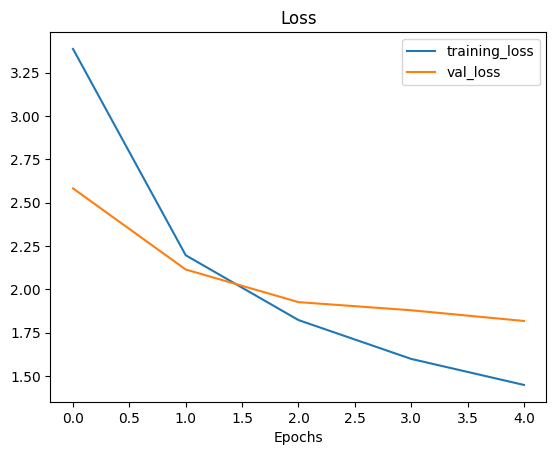

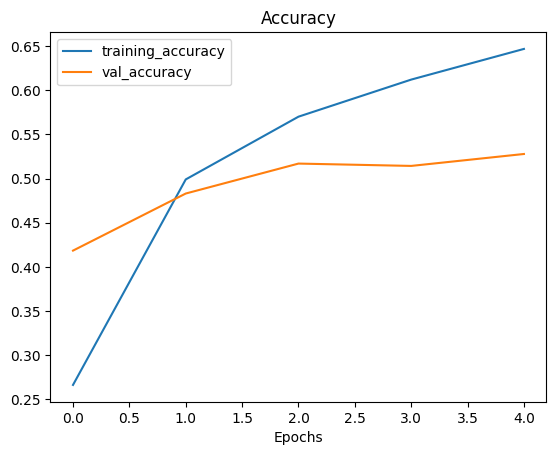

In [33]:
plot_loss_curves(history_all_classes_10_percent)

## Fine Tuning Our Model With Transfer Learning

In [15]:
# unfreeze base model
base_model.trainable = True

# refreeze every layer except for last 5 ones

for layer in base_model.layers[:-5]:
  layer.trainable = False

In [16]:
# recompile with lower learning rate

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [17]:
# trainable layers
for layer in model.layers:
  print(layer.name, layer.trainable)

input layer True
data_augementation True
efficientnetb0 True
GlobalAveragePooling True
output_layer True


In [18]:
# trainable layers in base_model

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [19]:
# finte turning for additional five epochs

fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs = fine_tune_epochs,
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     initial_epoch = history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 68s 242ms/step - loss: 1.2079 - accuracy: 0.6832 - val_loss: 1.8054 - val_accuracy: 0.5310
Epoch 6/10
237/237 [==============================] - 48s 201ms/step - loss: 1.0998 - accuracy: 0.7125 - val_loss: 1.8115 - val_accuracy: 0.5283
Epoch 7/10
237/237 [==============================] - 52s 219ms/step - loss: 1.0193 - accuracy: 0.7273 - val_loss: 1.8122 - val_accuracy: 0.5283
Epoch 8/10
237/237 [==============================] - 47s 198ms/step - loss: 0.9442 - accuracy: 0.7493 - val_loss: 1.7841 - val_accuracy: 0.5395
Epoch 9/10
237/237 [==============================] - 48s 203ms/step - loss: 0.8942 - accuracy: 0.7595 - val_loss: 1.8023 - val_accuracy: 0.5305
Epoch 10/10
237/237 [==============================] - 43s 180ms/step - loss: 0.8245 - accuracy: 0.7790 - val_loss: 1.8606 - val_accuracy: 0.5238


In [42]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 58s 74ms/step - loss: 1.4941 - accuracy: 0.6030


[1.4940563440322876, 0.60297030210495]

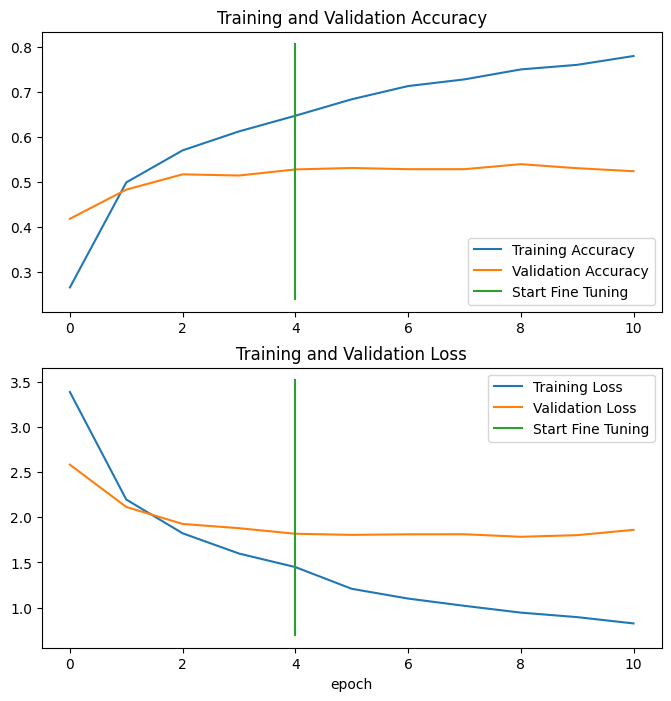

In [43]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [44]:
model.save("food_class_10_percent_saved_big_dog_model.keras")

## Test Our Saved Model

In [ ]:
# load our model
model = tf.keras.models.load_model("food_class_10_percent_saved_big_dog_model.keras") # path to drive model

In [34]:
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 [==============================] - 65s 82ms/step - loss: 1.4941 - accuracy: 0.6030


(1.4940563440322876, 0.60297030210495)

In [35]:
# prediction
pred_probs = model.predict(test_data, verbose = 1)

790/790 [==============================] - 63s 80ms/step


In [26]:
len(pred_probs)

25250

In [36]:
pred_probs.shape

(25250, 101)

In [37]:
pred_probs[:10]

array([[5.2044135e-02, 8.2995452e-05, 3.0746859e-01, ..., 1.3205785e-05,
        3.6170394e-03, 4.0503651e-02],
       [8.3405459e-01, 2.6719533e-08, 1.7985818e-03, ..., 4.1381805e-03,
        5.2970688e-07, 1.2890503e-05],
       [3.1163067e-01, 8.0742836e-03, 2.6164060e-02, ..., 4.8679594e-04,
        6.3112308e-04, 2.1861417e-03],
       ...,
       [1.4473487e-01, 2.1625301e-06, 3.8160896e-03, ..., 2.2787811e-02,
        8.2870509e-04, 4.4937030e-04],
       [1.5624145e-01, 2.0115111e-04, 2.1671391e-01, ..., 4.5601575e-04,
        6.2425825e-04, 2.0511729e-04],
       [5.2178109e-01, 3.8911196e-07, 2.1966125e-03, ..., 5.1975823e-03,
        5.0753720e-06, 1.7566289e-03]], dtype=float32)

In [38]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [5.20441346e-02 8.29954515e-05 3.07468593e-01 6.18586711e-08
 9.90955778e-06 9.62355671e-07 8.78024002e-05 3.62631295e-06
 2.23262124e-02 1.91227722e-04 1.71892202e-06 6.76501850e-06
 4.93576867e-04 4.55350005e-07 3.82446335e-03 2.11082096e-03
 1.04972478e-05 8.50217475e-04 5.57865296e-03 1.65751098e-05
 5.97134058e-04 1.42163544e-05 6.73124741e-05 1.28764703e-04
 9.82777798e-04 3.42825335e-03 6.82295242e-04 8.30973077e-05
 1.25708491e-01 8.66220507e-04 3.97849635e-06 8.92968324e-04
 2.84677779e-04 1.07839787e-06 1.00863781e-02 1.29973041e-05
 1.57719027e-04 2.79118516e-03 4.28739488e-02 1.00287645e-04
 9.25786793e-04 1.01708435e-03 1.15377930e-04 1.96124511e-05
 1.61926451e-04 2.33452429e-05 4.14329953e-03 1.18021031e-04
 5.90620289e-07 1.54582739e-01 6.25192246e-04 8.30545250e-05
 4.62839156e-02 2.68759914e-02 1.45270278e-05 7.12125609e-03
 1.87298134e-02 1.69688661e-03 5.17122820e-

In [39]:
pred_classes = pred_probs.argmax(axis = 1)
pred_classes[:15]

array([ 2,  0,  0,  8,  8, 78, 29, 46,  9,  0,  0, 49,  8,  8, 67])

In [40]:
# comparing test labels with predicted labels
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [41]:
len(y_labels)

25250

## Evaluation

In [46]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.602970297029703

In [47]:
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 5.075247000441152e-09


In [48]:
from helper_functions import make_confusion_matrix

In [49]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0]) # if not, integer class values will be used

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")


In [50]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [51]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.46      0.13      0.20       250
           1       0.58      0.70      0.63       250
           2       0.70      0.59      0.64       250
           3       0.85      0.47      0.61       250
           4       0.63      0.32      0.42       250
           5       0.58      0.32      0.41       250
           6       0.72      0.80      0.76       250
           7       0.82      0.77      0.79       250
           8       0.25      0.61      0.35       250
           9       0.44      0.64      0.52       250
          10       0.53      0.41      0.46       250
          11       0.86      0.49      0.62       250
          12       0.70      0.63      0.66       250
          13       0.59      0.54      0.56       250
          14       0.65      0.47      0.55       250
          15       0.45      0.33      0.38       250
          16       0.74      0.52      0.61       250
          17       0.39    

In [53]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.4583333333333333,
  'recall': 0.132,
  'f1-score': 0.20496894409937885,
  'support': 250},
 '1': {'precision': 0.5751633986928104,
  'recall': 0.704,
  'f1-score': 0.6330935251798561,
  'support': 250},
 '2': {'precision': 0.7033492822966507,
  'recall': 0.588,
  'f1-score': 0.6405228758169934,
  'support': 250},
 '3': {'precision': 0.8489208633093526,
  'recall': 0.472,
  'f1-score': 0.6066838046272494,
  'support': 250},
 '4': {'precision': 0.626984126984127,
  'recall': 0.316,
  'f1-score': 0.4202127659574468,
  'support': 250},
 '5': {'precision': 0.5755395683453237,
  'recall': 0.32,
  'f1-score': 0.41131105398457585,
  'support': 250},
 '6': {'precision': 0.7220216606498195,
  'recall': 0.8,
  'f1-score': 0.759013282732448,
  'support': 250},
 '7': {'precision': 0.8205128205128205,
  'recall': 0.768,
  'f1-score': 0.7933884297520661,
  'support': 250},
 '8': {'precision': 0.2504118616144975,
  'recall': 0.608,
  'f1-score': 0.3547257876312718,
  'support': 2

In [55]:
# Create empty dictionary for each class with their f1-score as it combines precision and recall
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.20496894409937885,
 'baby_back_ribs': 0.6330935251798561,
 'baklava': 0.6405228758169934,
 'beef_carpaccio': 0.6066838046272494,
 'beef_tartare': 0.4202127659574468,
 'beet_salad': 0.41131105398457585,
 'beignets': 0.759013282732448,
 'bibimbap': 0.7933884297520661,
 'bread_pudding': 0.3547257876312718,
 'breakfast_burrito': 0.5196078431372549,
 'bruschetta': 0.46153846153846156,
 'caesar_salad': 0.6224489795918366,
 'cannoli': 0.6610526315789474,
 'caprese_salad': 0.5625000000000001,
 'carrot_cake': 0.5454545454545455,
 'ceviche': 0.37962962962962965,
 'cheese_plate': 0.6070588235294118,
 'cheesecake': 0.4218181818181818,
 'chicken_curry': 0.5046728971962616,
 'chicken_quesadilla': 0.6814516129032258,
 'chicken_wings': 0.7116104868913857,
 'chocolate_cake': 0.5538461538461539,
 'chocolate_mousse': 0.3483606557377049,
 'churros': 0.718052738336714,
 'clam_chowder': 0.7096774193548386,
 'club_sandwich': 0.678038379530917,
 'crab_cakes': 0.3832335329341317,
 'creme_brulee

In [56]:
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33        edamame  0.972222
63       macarons  0.884026
69        oysters  0.869388
75            pho  0.842505
45  frozen_yogurt  0.835341

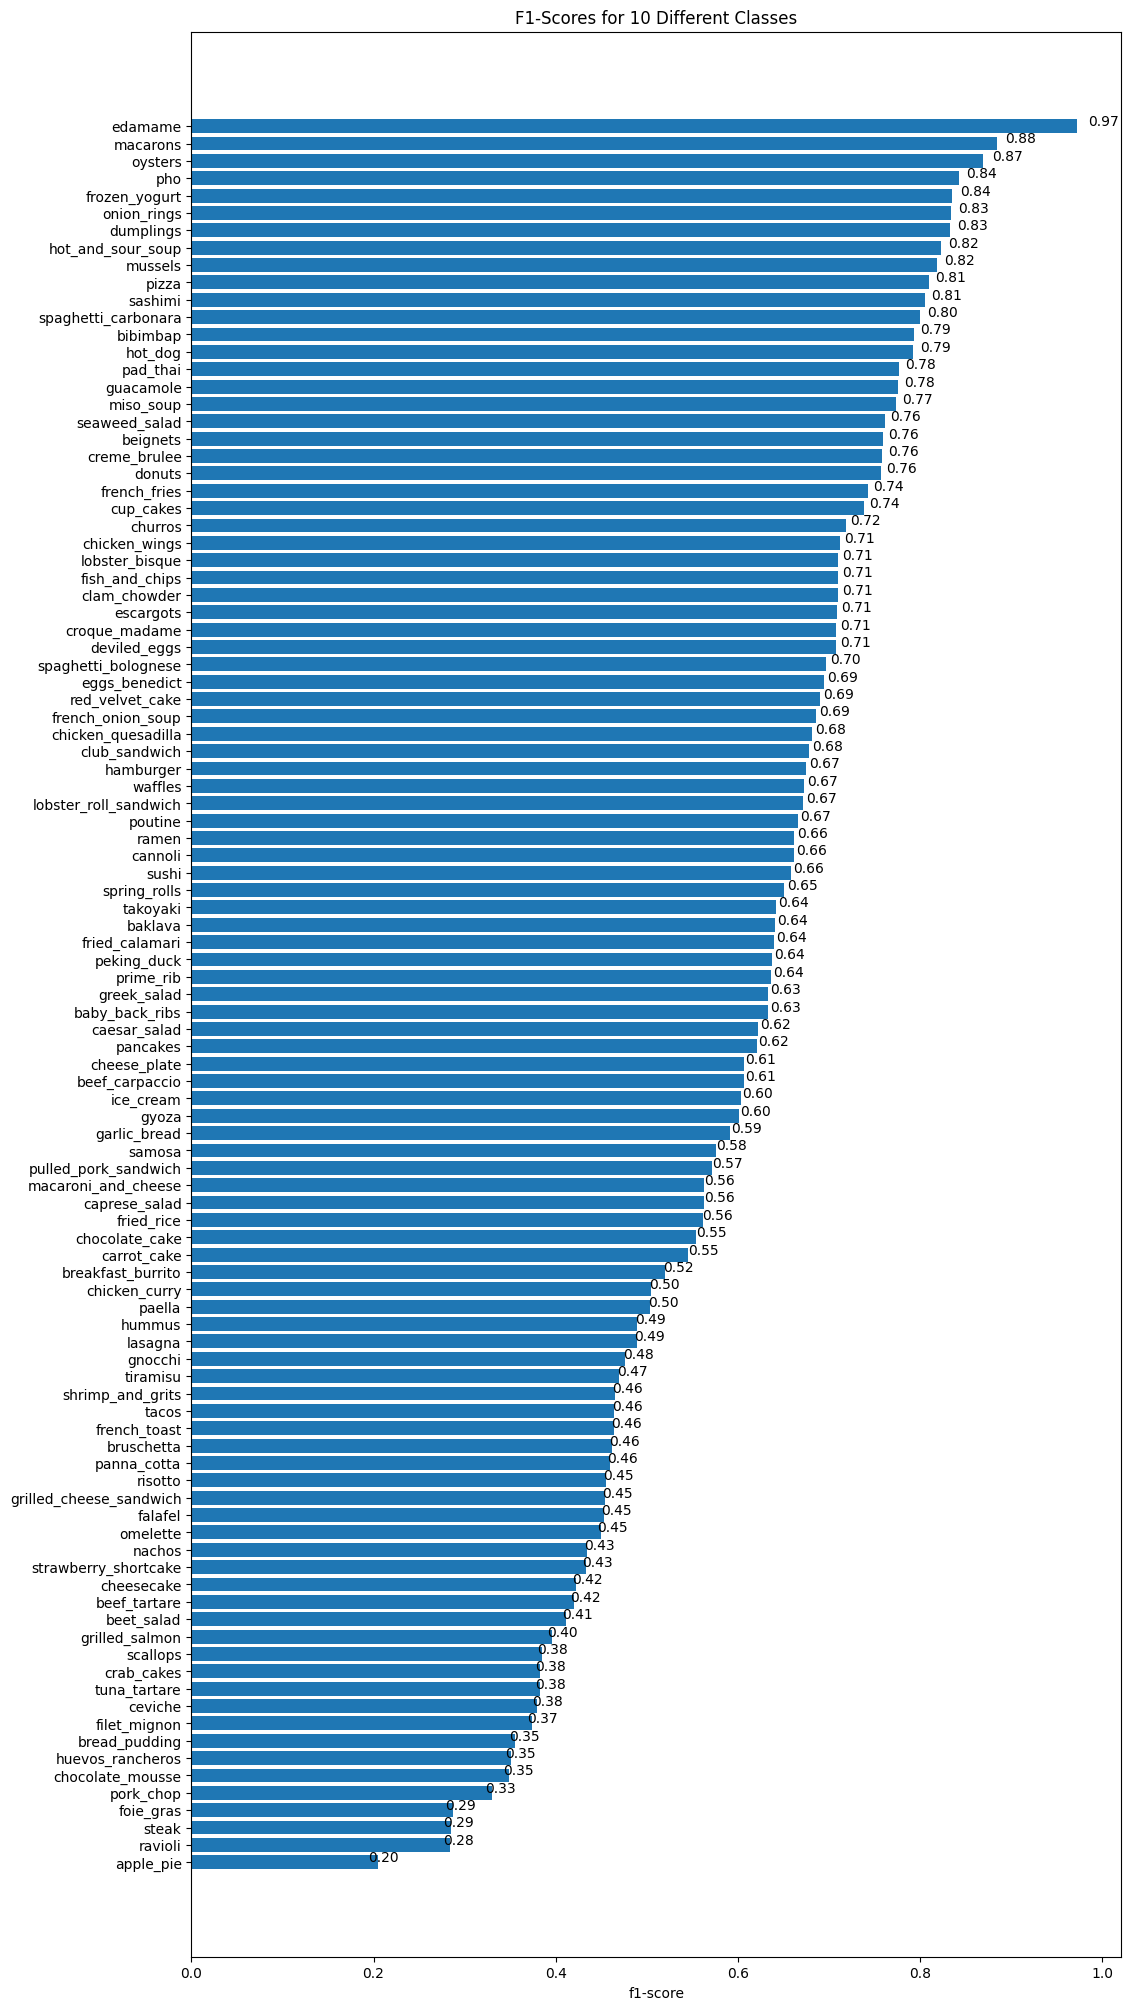

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

Above graph shows our models performance on different classes

In [58]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 45ms/step


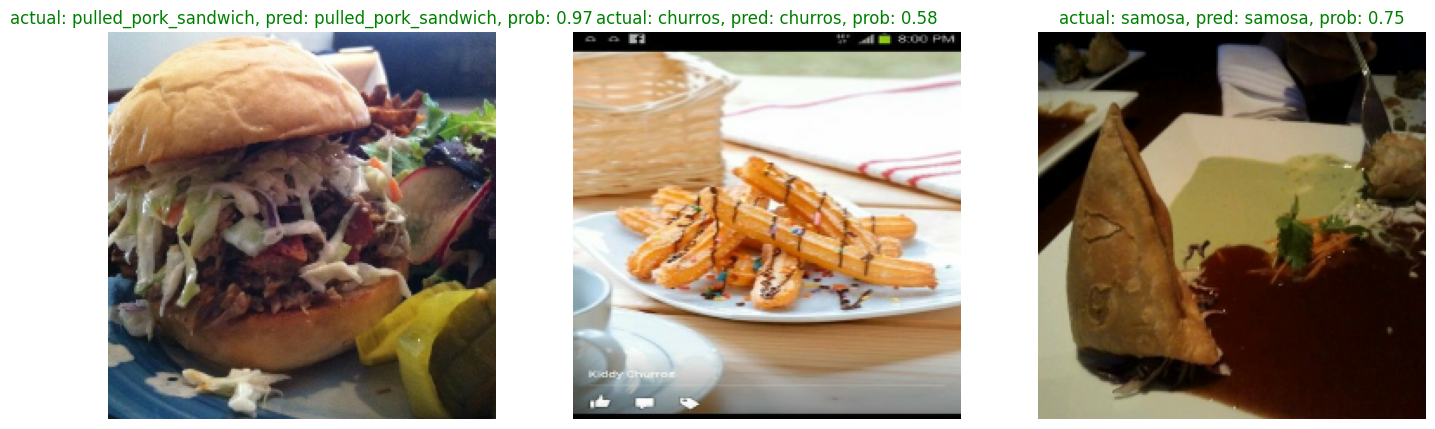

In [59]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):

  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [60]:
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [61]:
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0       2   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  
0   0.307469        apple_pie          baklava  
1   0.834055        apple_pie        apple_pie  
2   0.311631        apple_pie        apple_pie  
3   0.355296        apple_pie    bread_pudding  
4   0.683242        apple_pie    bread_pudding

In [62]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0       2   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.307469        apple_pie          baklava         False  
1   0.834055        apple_pie        apple_pie          True  
2   0.311631        apple_pie        apple_pie          True  
3   0.355296        apple_pie    bread_pudding         False  
4   0.683242        apple_pie    bread_pudding         False

In [63]:
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
23797  b'101_food_classes_10_percent/test/sushi/16593...      95      86   
15142  b'101_food_classes_10_percent/test/lobster_bis...      60      64   
10847  b'101_food_classes_10_percent/test/fried_calam...      43      68   
23631  b'101_food_classes_10_percent/test/strawberry_...      94      83   
17855  b'101_food_classes_10_percent/test/paella/2314...      71      65   
722    b'101_food_classes_10_percent/test/baklava/640...       2      85   
191    b'101_food_classes_10_percent/test/apple_pie/3...       0      31   
7295   b'101_food_classes_10_percent/test/cup_cakes/1...      29      31   
11642  b'101_food_classes_10_percent/test/garlic_brea...      46      10   
10880  b'101_food_classes_10_percent/test/fried_calam...      43      68   
14630  b'101_food_classes_10_percent/test/ice_cream/3...      58      78   
18001  b'101_food_classes_10_percent/test/pancakes/10...      72      67   
24479  b'101_food_classes_10_percent/test/takoyaki/68...      97      78   
8794   b'101_food_classes_10_percent/test/escargots/1...      35      41   
16271  b'101_food_classes_10_percent/test/mussels/140...      65      69   
6108   b'101_food_classes_10_percent/test/clam_chowde...      24      27   
7194   b'101_food_classes_10_percent/test/croque_mada...      28       7   
9326   b'101_food_classes_10_percent/test/filet_migno...      37      79   
8664   b'101_food_classes_10_percent/test/eggs_benedi...      34      86   
5652   b'101_food_classes_10_percent/test/chocolate_m...      22      98   

       pred_conf      y_true_classname   y_pred_classname  pred_correct  
23797   0.999572                 sushi            sashimi         False  
15142   0.998639        lobster_bisque          miso_soup         False  
10847   0.996672        fried_calamari        onion_rings         False  
23631   0.996449  strawberry_shortcake    red_velvet_cake         False  
17855   0.994347                paella            mussels         False  
722     0.994091               baklava             samosa         False  
191     0.993335             apple_pie             donuts         False  
7295    0.993324             cup_cakes             donuts         False  
11642   0.992400          garlic_bread         bruschetta         False  
10880   0.992041        fried_calamari        onion_rings         False  
14630   0.991890             ice_cream            poutine         False  
18001   0.991622              pancakes           omelette         False  
24479   0.990557              takoyaki            poutine         False  
8794    0.990343             escargots  french_onion_soup         False  
16271   0.990314               mussels            oysters         False  
6108    0.990284          clam_chowder       creme_brulee         False  
7194    0.990128         croque_madame           bibimbap         False  
9326    0.990095          filet_mignon          prime_rib         False  
8664    0.989198         eggs_benedict            sashimi         False  
5652    0.988777      chocolate_mousse           tiramisu         False

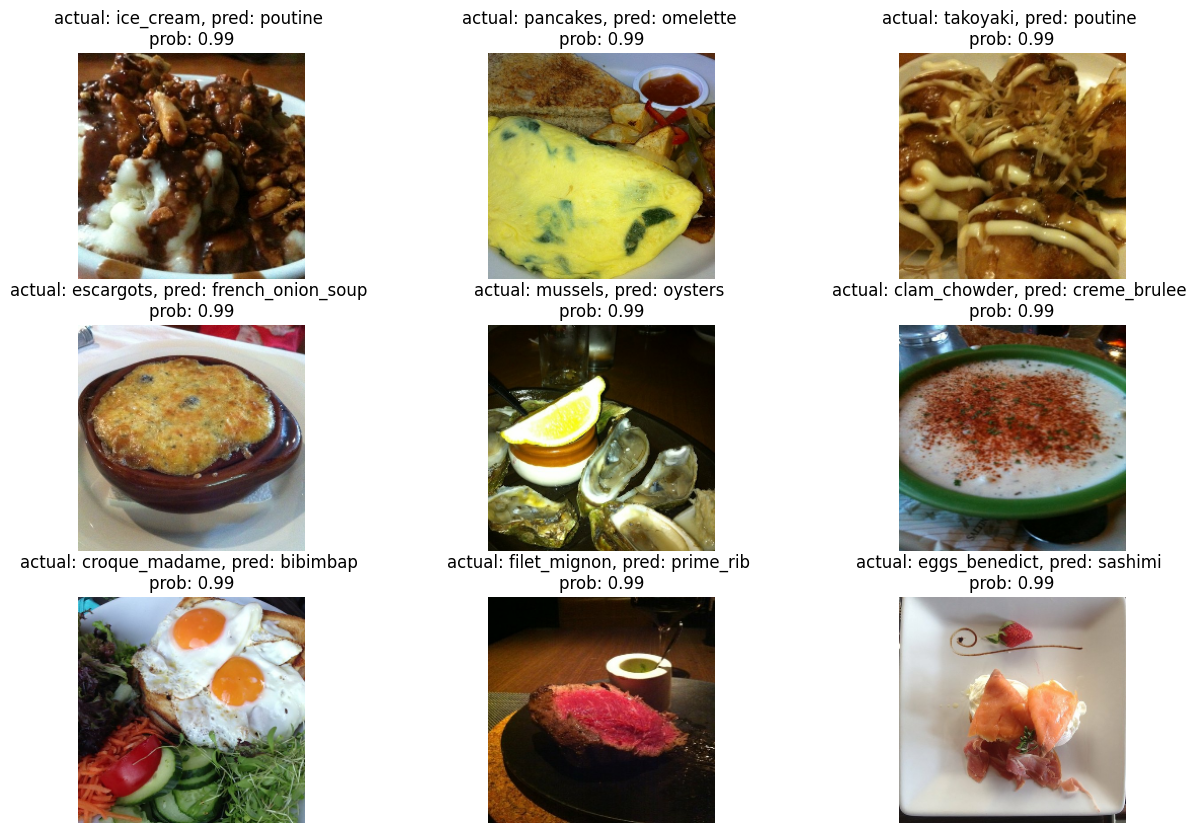

In [64]:
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

In [66]:
# testing on custom data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data("custom_food_images.zip")

--2023-09-19 06:40:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.207, 172.217.214.207, 108.177.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  67.9MB/s    in 0.2s    

2023-09-19 06:40:32 (67.9 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [67]:
# Get custom food images filepaths
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/sushi.jpeg',
 'custom_food_images/pizza-dad.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/ramen.jpeg']

1/1 [==============================] - 0s 60ms/step


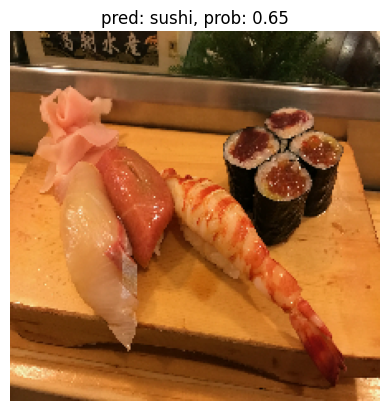

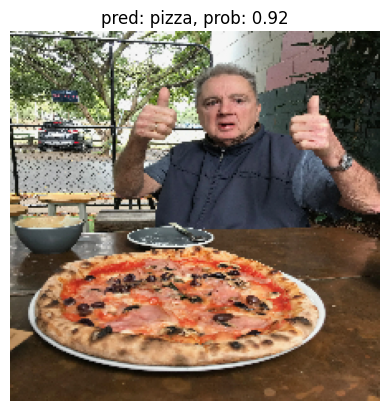

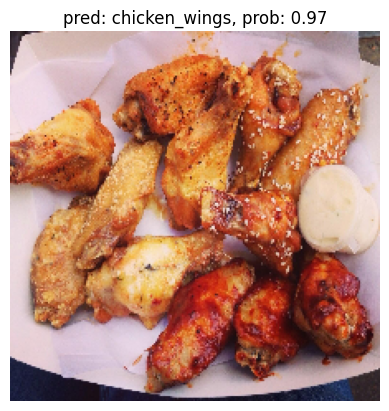

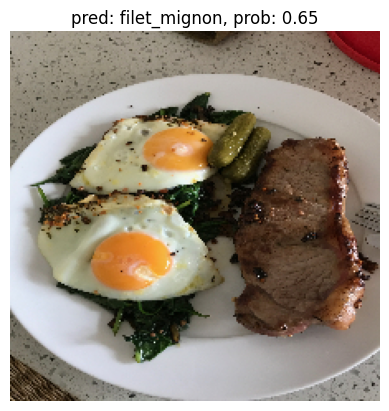

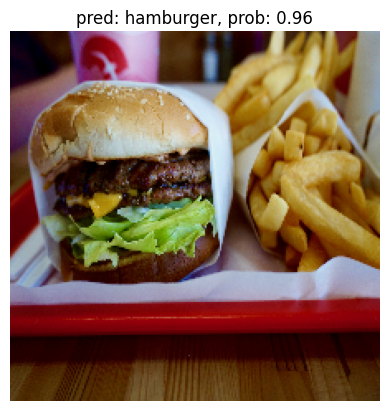

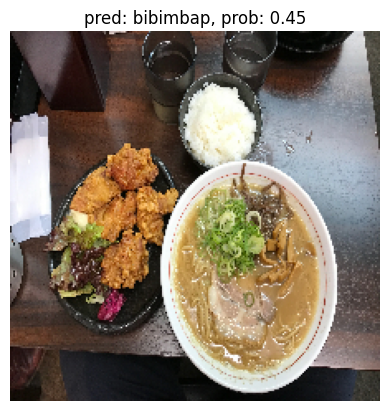

In [68]:
# predictions on custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label

  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)